In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
cd C:\Users\kalpa\Data Science project\AQI\Data\Real-Data

C:\Users\kalpa\Data Science project\AQI\Data\Real-Data


In [3]:
df = pd.read_excel("Final_df.xlsx", header= None)

In [37]:
df.dtypes

T        float64
TM       float64
Tm       float64
SLP      float64
H          int64
VV       float64
V         object
VM       float64
PM2.5    float64
dtype: object

In [6]:
df.columns = ["T","TM","Tm","SLP","H","VV","V","VM","PM2.5"]

In [29]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM2.5
0,14.9,21.6,8.8,1017.4,76,0.8,0.9,7.6,313.22
1,14.7,21.6,10.2,1018.1,97,0.6,3.1,9.4,186.18
2,15,16.8,13.6,1017.5,94,0.5,0.9,7.6,87.18
6,9.8,17.6,6.4,1016.6,90,0.5,3.9,11.1,217.87
7,10.1,14.5,7.2,1019.2,90,0.3,3.3,7.6,229.90


In [34]:
df["T"].value_counts()

31.6    12
31.9    12
32.2    11
28.8    11
31.2    10
        ..
12.5     1
38       1
35       1
21.5     1
8.8      1
Name: T, Length: 264, dtype: int64

In [28]:
df.dropna(inplace =True)

In [32]:
df = df.replace(to_replace='-', value=np.nan).dropna()

In [36]:
df["T"] = pd.to_numeric(df["T"])
df["TM"] = pd.to_numeric(df["TM"])
df["Tm"] = pd.to_numeric(df["Tm"])
df["SLP"] = pd.to_numeric(df["SLP"])
df["H"] = pd.to_numeric(df["H"])
df["VV"] = pd.to_numeric(df["VV"])
df["VM"] = pd.to_numeric(df["VM"])

In [38]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM2.5
0,14.9,21.6,8.8,1017.4,76,0.8,0.9,7.6,313.22
1,14.7,21.6,10.2,1018.1,97,0.6,3.1,9.4,186.18
2,15.0,16.8,13.6,1017.5,94,0.5,0.9,7.6,87.18
6,9.8,17.6,6.4,1016.6,90,0.5,3.9,11.1,217.87
7,10.1,14.5,7.2,1019.2,90,0.3,3.3,7.6,229.90


In [39]:
X = df.iloc[:,:-1]

In [40]:
y = df.iloc[:,-1]

In [41]:
y.head()

0    313.22
1    186.18
2     87.18
6    217.87
7    229.90
Name: PM2.5, dtype: float64

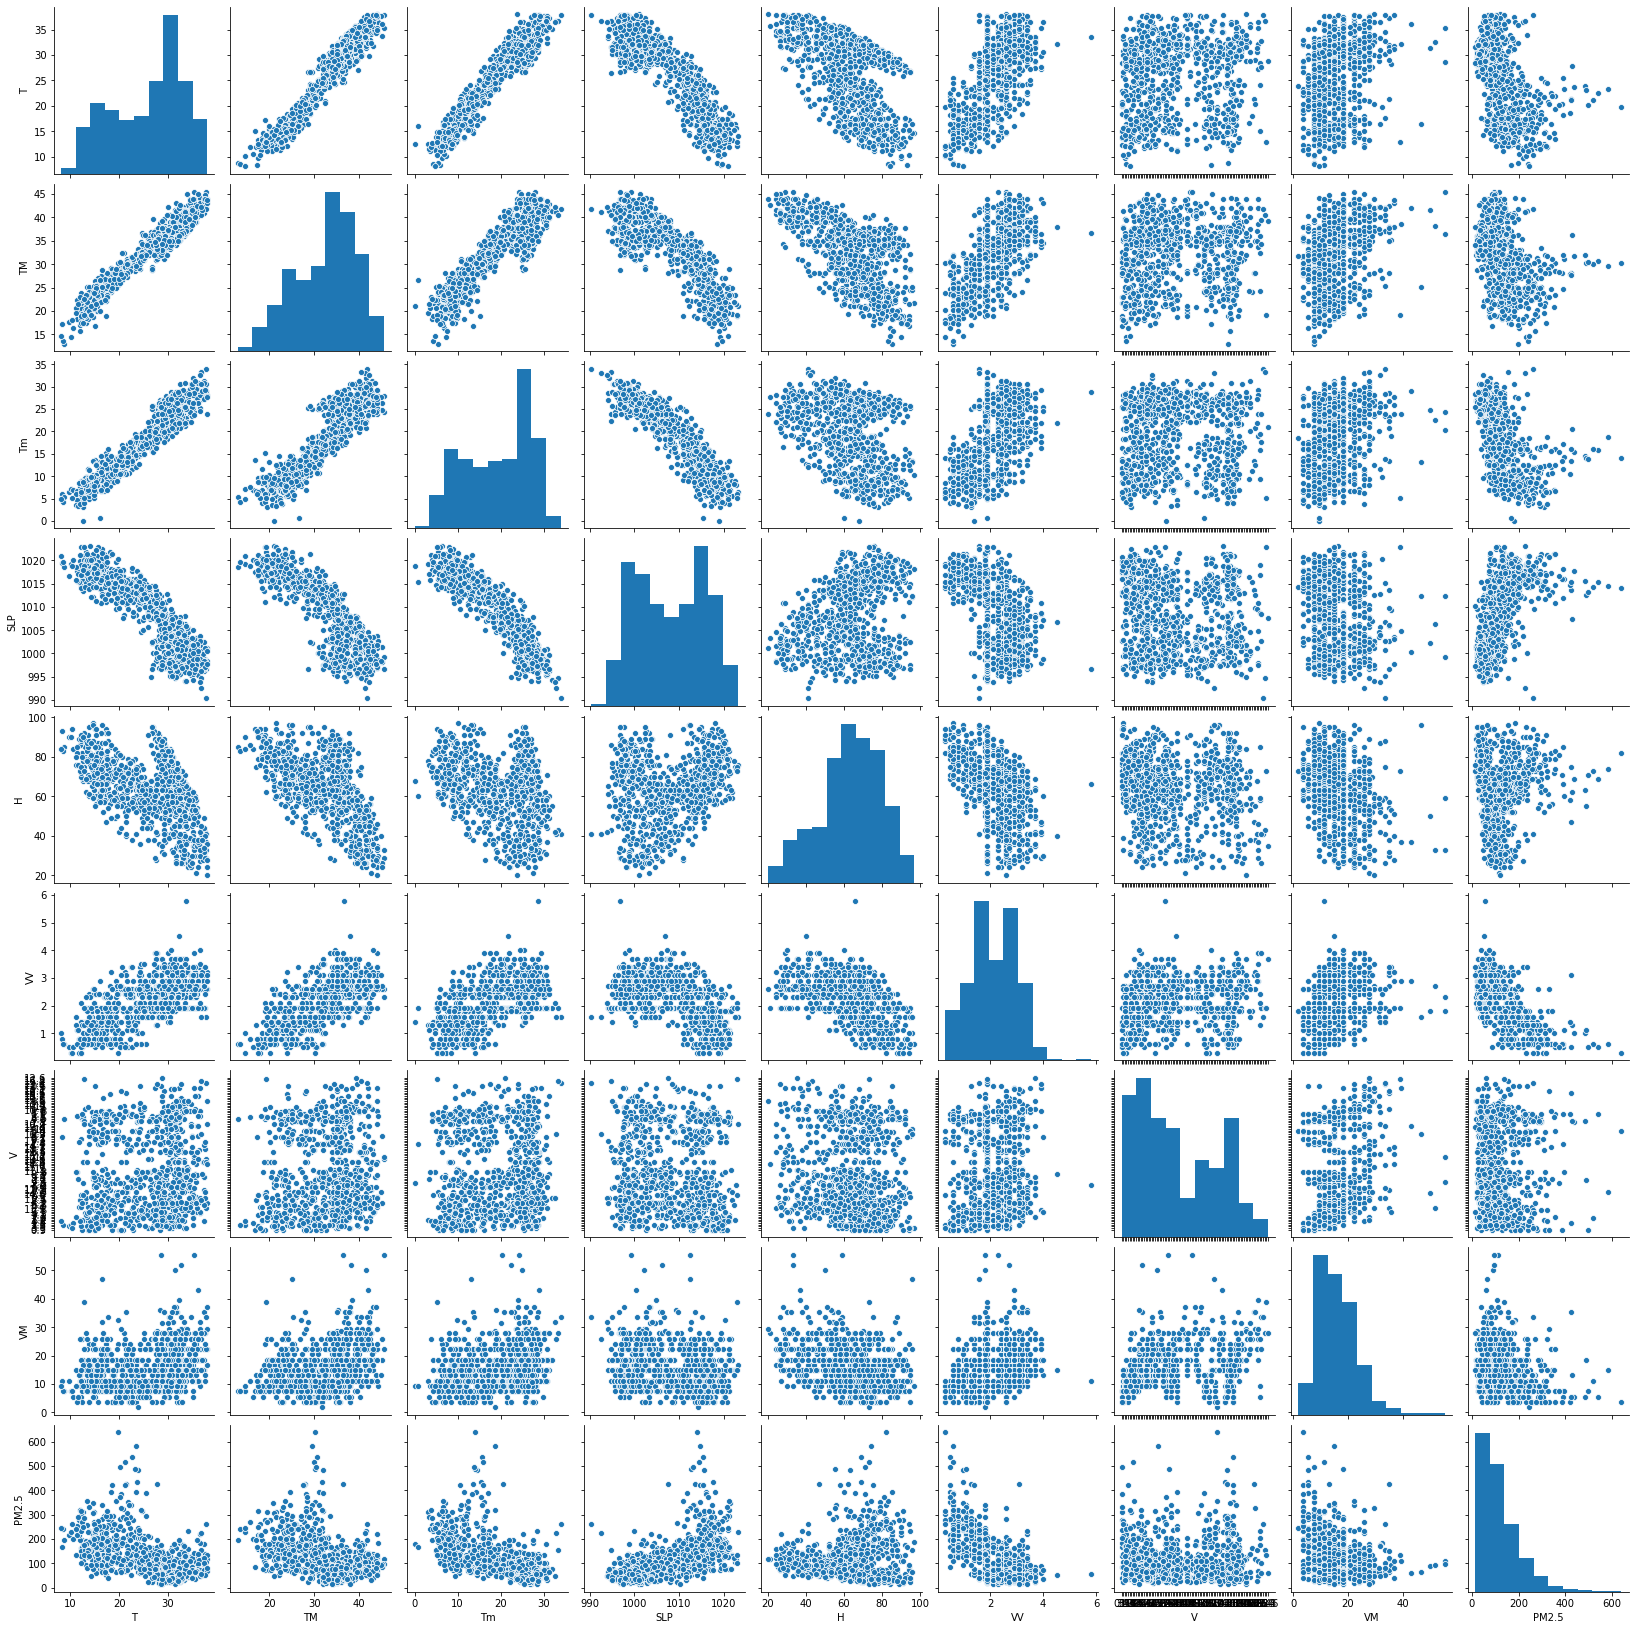

In [42]:
sns.pairplot(df)

In [43]:
df.corr()

,T,TM,Tm,SLP,H,VV,VM,PM2.5
T,1.000000,0.963414,0.953700,-0.885899,-0.524588,0.656013,0.278713,-0.531479
TM,0.963414,1.000000,0.888732,-0.830644,-0.598926,0.625076,0.291130,-0.449051
Tm,0.953700,0.888732,1.000000,-0.916239,-0.302975,0.563107,0.244637,-0.597993
SLP,-0.885899,-0.830644,-0.916239,1.000000,0.266543,-0.525836,-0.261835,0.593866
H,-0.524588,-0.598926,-0.302975,0.266543,1.000000,-0.529835,-0.363676,0.074641
VV,0.656013,0.625076,0.563107,-0.525836,-0.529835,1.000000,0.316341,-0.616468
VM,0.278713,0.291130,0.244637,-0.261835,-0.363676,0.316341,1.000000,-0.250570
PM2.5,-0.531479,-0.449051,-0.597993,0.593866,0.074641,-0.616468,-0.250570,1.000000


In [46]:
corr_features =df.corr().index

### Correlation Matrix with Heatmap

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.


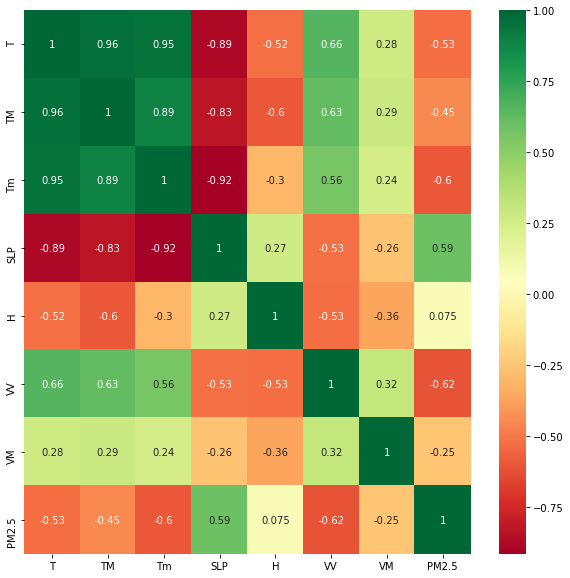

In [52]:
plt.figure(figsize= (10,10))
sns.heatmap(df[corr_features].corr(), annot = True, cmap ="RdYlGn")


### Feature Importance

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.


In [53]:
from sklearn.ensemble import ExtraTreesRegressor

In [54]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [55]:
print(model.feature_importances_)

[0.121723   0.10555158 0.14781923 0.15023719 0.0842227  0.27895581
 0.06636183 0.04512866]


In [56]:
feat_importances = pd.Series(model.feature_importances_, index = X.columns)

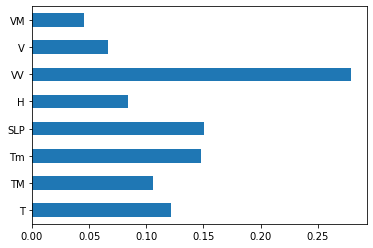

In [58]:
feat_importances.plot(kind ="barh")

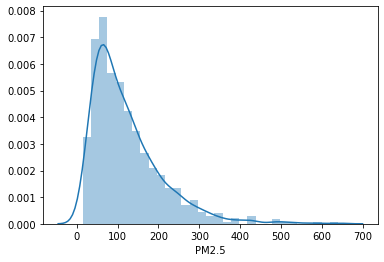

In [59]:
sns.distplot(y)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [62]:
from sklearn.linear_model import LinearRegression

In [64]:
regressor = LinearRegression()

In [66]:
regressor.fit(X_train,y_train)

LinearRegression()

In [74]:
regressor.coef_

array([  9.1805024 ,   2.86481826, -10.07221264,   3.76938994,
        -0.47089814, -67.96786422,  -0.89648331,  -0.41810893])

In [75]:
regressor.intercept_

-3624.389643147264

In [68]:
print("Coefficients of R^2, training set : {}".format(regressor.score(X_train,y_train)))

Coefficients of R^2, training set : 0.6114800305431514


In [69]:
print("Coefficients of R^2, testing set : {}".format(regressor.score(X_test,y_test)))

Coefficients of R^2, testing set : 0.5947751578235253


In [70]:
from sklearn.model_selection import cross_val_score

In [71]:
score = cross_val_score(regressor, X,y,cv =5)

In [73]:
print(score.mean())

0.5405041209144148


In [76]:
prediction = regressor.predict(X_test)

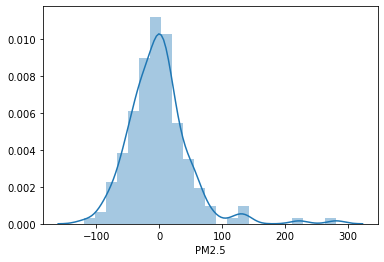

In [77]:
sns.distplot(y_test-prediction)


### Regression Evaluation Metrics

Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

Mean Squared Error (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

    MAE is the easiest to understand, because it's the average error.
    MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
    RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.


In [78]:
from sklearn import metrics

In [79]:
metrics.mean_absolute_error(y_test, prediction)

34.360567405418585

In [80]:
metrics.mean_squared_error(y_test, prediction)

2484.786272678834

In [82]:
np.sqrt(metrics.mean_squared_error(y_test, prediction))

49.84763056233299

In [83]:
cd C:\Users\kalpa\Data Science project\AQI\Data\pickle file

C:\Users\kalpa\Data Science project\AQI\Data\pickle file


In [86]:
import pickle

In [87]:
file =open("rgression_model.pkl", "wb")

In [88]:
pickle.dump(regressor,file)